In [240]:
# import libraries
import numpy as np
import pandas as pd

In [241]:
# Load the selected Data Set.
df = pd.read_csv('telco_customer_churn.csv')
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

In [242]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [243]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [244]:
# Split the data set into the train and test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [245]:
# Analyze and Preprocess your data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [246]:
df.info()  # view information about the data, including the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:ylabel='Frequency'>

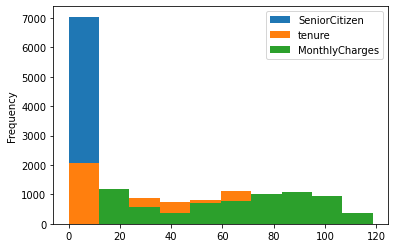

In [247]:
df.plot(kind = 'hist')

In [248]:
# check for missing values
df.isnull().sum()

# fill missing values with the mean of the column
df.fillna(df.mean(), inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_42520\958631764.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True)


In [249]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [250]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
mean_values = numeric_columns.mean()
df.fillna(mean_values, inplace=True)

In [251]:
from sklearn.model_selection import train_test_split

# X = df.drop(['Churn', 'customerID'], axis=1)  # feature columns
X = df[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
y = df['Churn']  # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# train a model
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')


Model accuracy: 0.75


In [253]:
# Create an instance of Gaussian Naive Bayes 
# (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model = GaussianNB(priors=None, var_smoothing=1e-09)

In [254]:
# Create an instance of Multinomial Naive Bayes  
# (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data and split it into training and test sets
X = df[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
y = df['Churn']  # target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')


Model accuracy: 0.72


In [255]:
# Create an instance of Bernoulli Naive Bayes 
# (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model = BernoulliNB(alpha=1.0, fit_prior=True, class_prior=None)

# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data and split it into training and test sets
X = df[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
y = df['Churn']  # target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 0.74


In [258]:
# Train every version of Naive Bayes on the train data set and make predictions on the corresponding test subsets.
# Get the accuracy of model.

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data and split it into training and test sets
X = df[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
y = df['Churn']  # target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()


# train the Gaussian Naive Bayes model and make predictions on the test set
gaussian_nb.fit(X_train, y_train)
y_pred = gaussian_nb.predict(X_test)

# evaluate the model
accuracy_ga = accuracy_score(y_test, y_pred)
print(f'Gaussian Naive Bayes accuracy: {accuracy_ga:.2f}')

# train the Multinomial Naive Bayes model and make predictions on the test set
multinomial_nb.fit(X_train, y_train)
y_pred = multinomial_nb.predict(X_test)

# evaluate the model
accuracy_mu = accuracy_score(y_test, y_pred)
print(f'Multinomial Naive Bayes accuracy: {accuracy_mu:.2f}')

# train the Bernoulli Naive Bayes model and make predictions on the test set
bernoulli_nb.fit(X_train, y_train)
y_pred = bernoulli_nb.predict(X_test)

# evaluate the model
accuracy_be = accuracy_score(y_test, y_pred)
print(f'Bernoulli Naive Bayes accuracy: {accuracy_be:.2f}')

Gaussian Naive Bayes accuracy: 0.76
Multinomial Naive Bayes accuracy: 0.72
Bernoulli Naive Bayes accuracy: 0.74


In [259]:
# Create a table of the following structure as a pandas data frame.
# define the data for the table
data = {
    'ML model': ['GaussianNB', 'MultinomialNB', 'BernoulliNB'],
    'Accuracy': [accuracy_ga, accuracy_mu, accuracy_be],
    
}

# create the DataFrame
new_df = pd.DataFrame(data)

# display the DataFrame
print(new_df)


        ML model  Accuracy
0     GaussianNB  0.761533
1  MultinomialNB  0.721789
2    BernoulliNB  0.735273


Conclusion?

Care e sensul la accuratețe?